# Assignment 1

## 1.
### a)

#### Importing ourworldindata csv file

In [106]:
import pandas as pd

# https://ourworldindata.org/life-expectancy#life-expectancy-and-gdp
df = pd.read_csv('datasets\life-expectancy-vs-gdp-per-capita.csv')
df.columns

Index(['Entity', 'Code', 'Year', 'Total population (Gapminder, HYDE & UN)',
       'Continent', 'Life expectancy',
       'Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'],
      dtype='object')

#### Cleaning and selecting data
We chose the year 2012 simply becasue we found it to not have a lot of missing data for GDP and life expectancy.

In [107]:
# Renaming the GDP per capita and total population columns for simplicity
df.rename(columns={'Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))': 'GDP per capita', 'Total population (Gapminder, HYDE & UN)': 'Total population'}, inplace=True)

# Only selecting the rows where year is 2012
gdp2012 = df[df['Year'] == 2012]

# Creating dataframe with the relevant columns
gdp2012 = pd.DataFrame(gdp2012, columns=['Entity', 'Year', 'GDP per capita', 'Life expectancy', 'Total population'])

# Cleaning the data, removing NaN-values
gdp2012.dropna(subset=['GDP per capita'], inplace=True)
gdp2012.dropna(subset=['Life expectancy'], inplace=True)

# Removing non-countries
gdp2012 = gdp2012[gdp2012['Entity'] != 'World']
gdp2012 = gdp2012[gdp2012['Entity'] != 'Africa']

gdp2012


,Entity,Year,GDP per capita,Life expectancy,Total population
213,Afghanistan,2012,1945.0,62.054,31161000.0
557,Albania,2012,10344.0,77.252,2914000.0
777,Algeria,2012,13242.0,75.436,37384000.0
1363,Angola,2012,8074.0,57.236,25108000.0
1874,Argentina,2012,19841.0,75.598,41755000.0
...,...,...,...,...,...
48669,Venezuela,2012,17752.0,73.037,29361000.0
48889,Vietnam,2012,4911.0,74.958,89802000.0
49767,Yemen,2012,3707.0,65.920,24473000.0
49990,Zambia,2012,3413.0,58.502,14465000.0


#### Plotting the data
We added a simple regression line with the help of numpy in order to make the correlation clearer.

The x and y limits were changed to make the graph clearer since one outlier (Qatar) made the graph hard to interpret.

Text(0, 0.5, 'Life expectancy')

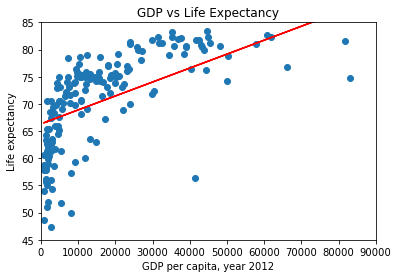

In [108]:
import matplotlib.pyplot as plt
import numpy as np

x = gdp2012['GDP per capita']
y = gdp2012['Life expectancy']

# Creating scatterplot with custom x and y limits
plt.scatter(x, y)
plt.xlim(0, 90000) # Includes every country except for Qatar
plt.ylim(45, 85)

# Adding regression line
k, m = np.polyfit(x, y, 1)
plt.plot(x, k*x + m, color='red')

# Adding title and labels
plt.title('GDP vs Life Expectancy')
plt.xlabel('GDP per capita, year 2012')
plt.ylabel('Life expectancy')

### b)
There seems to be a correlation between GDP per capita and life expectancy, which seems reasonable since richer countries tends to have better access to e.g. healthcare.

### c)
We removed all rows with missing data for either GDP or life expectancy since they were not useful. The rows for World and Africa were also removed since we only include countries in this and do not want these values to mess with e.g. the mean and standard deviation. When plotting the data, we also changed the x-limit in order to exclude Qatar since their extremely high GDP per capita made the graph hard to interpret.

### d)


In [109]:
# Calculating the standard deviation and mean of the life expectancy
sd = np.std(gdp2012['Life expectancy'])
mean = np.mean(gdp2012['Life expectancy'])

# Selecting all the rows where the life expectancy is higher than one standard deviation above the mean
countries_above_one_sd = gdp2012[gdp2012['Life expectancy'] > (mean + sd)]

countries_above_one_sd

,Entity,Year,GDP per capita,Life expectancy,Total population
2507,Australia,2012,44871.0,82.291,22904000.0
2727,Austria,2012,43052.0,80.906,8502000.0
4277,Belgium,2012,38907.0,80.444,11085000.0
7569,Canada,2012,41615.0,81.674,34922000.0
10717,Cyprus,2012,27174.0,79.812,1135000.0
11472,Denmark,2012,43697.0,79.958,5611000.0
14757,Finland,2012,38865.0,80.586,5415000.0
15710,France,2012,36773.0,81.852,63564000.0
16736,Germany,2012,43198.0,80.391,80973000.0
17247,Greece,2012,23898.0,80.963,10781000.0


### e)


In [110]:
# Calculating the standard deviation of life expectancy
sd_life = np.std(gdp2012['Life expectancy'])

# Calculating the mean of GDP and life expectancy
mean_life = np.mean(gdp2012['Life expectancy'])
mean_gdp = np.mean(gdp2012['GDP per capita'])

# We count all values above this value as having a high life expectancy
high_life = mean_life + (sd_life / 2)

# Selecting the rows where life expectancy is above high_life and GDP is below the mean
results = gdp2012[gdp2012['Life expectancy'] > high_life]
results = results[results['GDP per capita'] < mean_gdp]

results

,Entity,Year,GDP per capita,Life expectancy,Total population
557,Albania,2012,10344.0,77.252,2914000.0
777,Algeria,2012,13242.0,75.436,37384000.0
3829,Barbados,2012,10475.0,78.547,284000.0
5517,Bosnia and Herzegovina,2012,9388.0,76.401,3605000.0
9033,Colombia,2012,12078.0,75.882,46076000.0
9763,Costa Rica,2012,12397.0,79.074,4688000.0
10427,Cuba,2012,7138.0,78.446,11257000.0
12496,Ecuador,2012,10342.0,75.495,15474000.0
23960,Lebanon,2012,15903.0,78.611,5538000.0
28999,Montenegro,2012,15709.0,75.823,626000.0


### f)

In [111]:
# Add column for total GDP to gdp2012 dataframe
total_gdp = gdp2012['GDP per capita'] * gdp2012['Total population']
gdp2012['Total GDP'] = total_gdp

# Calculating the mean of total GDP and life expectancy
mean_life = np.mean(gdp2012['Life expectancy'])
mean_total_gdp = np.mean(gdp2012['Total GDP'])

# Selecting the rows where total gdp is higher than the mean and life expectancy is below the mean
results = gdp2012[gdp2012['Total GDP'] > mean_total_gdp]
results = results[results['Life expectancy'] < mean_life]

results

,Entity,Year,GDP per capita,Life expectancy,Total population,Total GDP
12724,Egypt,2012,10736.0,70.736,8.642200e+07,9.278266e+11
19886,India,2012,4974.0,67.545,1.265780e+09,6.295990e+12
20106,Indonesia,2012,9144.0,69.866,2.484520e+08,2.271845e+12
31561,Nigeria,2012,5370.0,51.786,1.672290e+08,8.980197e+11
33118,Pakistan,2012,4568.0,65.849,1.872800e+08,8.554950e+11
36564,Russia,2012,23827.0,69.944,1.439940e+08,3.430945e+12
40973,South Africa,2012,11880.0,60.060,5.283300e+07,6.276560e+11


These countries listed in the table above all have high GDP (can be indicated as a strong economy) and low life expectancy. This means that not every strong economy (or at least high GDP) have high life expectancy. This might be due to their high total population or money not being fairly distributed. If you have a large population it does not matter that your GDP is higher than other smaller countries since it will be spread across more people.

### g)

In [112]:
# Calculating the mean of total GDP and life expectancy
mean_life = np.mean(gdp2012['Life expectancy'])
mean_gdp = np.mean(gdp2012['GDP per capita'])

# Selecting the rows where gdp per capita is higher than the mean and life expectancy is below the mean
results = gdp2012[gdp2012['GDP per capita'] > mean_gdp]
results = results[results['Life expectancy'] < mean_life]

results

,Entity,Year,GDP per capita,Life expectancy,Total population,Total GDP
13164,Equatorial Guinea,2012,41292.0,56.288,1031000.0,4.257205e+10
22182,Kazakhstan,2012,21947.0,68.805,16752000.0,3.676561e+11
36564,Russia,2012,23827.0,69.944,143994000.0,3.430945e+12


Now we only get three results, with only Russia being in both. Since the population size does not matter here, these countries low life expectancy might be explained by money not being fairly distributed and general bad healthcare for the majority of citizens. There only being three countries in this list indicates that there are very few countries that have high GDP per capita and low life expectancy. With other words, being a rich country does in almost all cases mean that your citizens will live long.

## 2
### a)
### GDP vs Happiness
#### Importing the data


In [113]:
# https://ourworldindata.org/happiness-and-life-satisfaction#the-link-across-countries
df_life = pd.read_csv('datasets\gdp-vs-happiness.csv')
df_life.columns

Index(['Entity', 'Code', 'Year', 'Total population (Gapminder, HYDE & UN)',
       'Continent',
       'Life satisfaction in Cantril Ladder (World Happiness Report 2019)',
       'GDP per capita, PPP (constant 2011 international $)'],
      dtype='object')

#### Cleaning the data

In [114]:
# Renaming columns for simplicity
df_life.rename(columns={'Life satisfaction in Cantril Ladder (World Happiness Report 2019)': 'Life satisfaction', 'Total population (Gapminder, HYDE & UN)': 'Total population', 'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita'}, inplace=True)

# Only selecting the rows where year is 2012
life2012 = df_life[df_life['Year'] == 2012]

# Creating dataframe with the relevant columns
life2012 = pd.DataFrame(life2012, columns=['Entity', 'Year', 'GDP per capita', 'Life satisfaction'])

# Cleaning the data, removing NaN-values
life2012.dropna(subset=['GDP per capita'], inplace=True)
life2012.dropna(subset=['Life satisfaction'], inplace=True)

life2012

,Entity,Year,GDP per capita,Life satisfaction
213,Afghanistan,2012,1839.273579,3.782938
556,Albania,2012,10369.823382,5.510124
776,Algeria,2012,13161.961673,5.604596
1286,Angola,2012,5999.902106,4.360250
1825,Argentina,2012,19224.874400,6.468387
...,...,...,...,...
46983,Venezuela,2012,17678.812497,7.066577
47203,Vietnam,2012,4821.137231,5.534570
47716,Yemen,2012,3793.412118,4.060601
47939,Zambia,2012,3509.413319,5.013375


#### Is there a correlation between GDP per capita and Life Satisfaction?

Text(0, 0.5, 'Life Satisfaction')

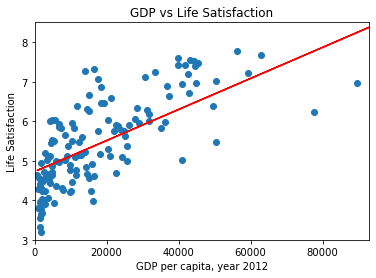

In [115]:
x = life2012['GDP per capita']
y = life2012['Life satisfaction']

# Creating scatterplot with custom x and y limits
plt.scatter(x, y)
plt.xlim(0, 93000) # Includes every country except for Qatar
plt.ylim(3, 8.5)

# Adding regression line
k, m = np.polyfit(x, y, 1)
plt.plot(x, k*x + m, color='red')

# Adding title and labels
plt.title('GDP vs Life Satisfaction')
plt.xlabel('GDP per capita, year 2012')
plt.ylabel('Life Satisfaction')

Yes, there seems to be a correlation. This is probably due to the fact that people living in richer countries do not have to worry about food and other basic needs as described in Maslows Hierarchy of Needs. In richer countries you have a much higher chance of reaching the top levels in Maslows hierarchy.

#### Does Life Satisfaction increase with Life Expectancy?

Text(0, 0.5, 'Life Satisfaction')

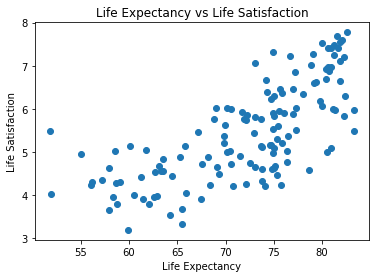

In [116]:
# Merging the life expectancy data frame with the life satisfaction one
df_merge = life2012.merge(gdp2012, on='Entity', how='outer').dropna(subset=['Life satisfaction'])

# Creating dataframe with the relevant columns
merge2012 = pd.DataFrame(df_merge, columns=['Entity', 'Life expectancy', 'Life satisfaction'])

x = merge2012['Life expectancy']
y = merge2012['Life satisfaction']

# Creating scatterplot
plt.scatter(x, y)

# Adding title and labels
plt.title('Life Expectancy vs Life Satisfaction')
plt.xlabel('Life Expectancy')
plt.ylabel('Life Satisfaction')

There seems to exist a high correlation after life expectancy reaches around 65 years, below that value we can not see any correlation. 

Text(0, 0.5, 'Life Satisfaction')

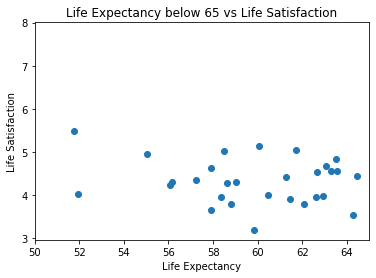

In [117]:
# Creating scatterplot with custom x limit
plt.scatter(x, y)
plt.xlim(50, 65)

# Adding title and labels
plt.title('Life Expectancy below 65 vs Life Satisfaction')
plt.xlabel('Life Expectancy')
plt.ylabel('Life Satisfaction')

Text(0, 0.5, 'Life Satisfaction')

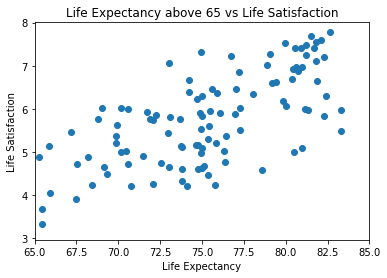

In [118]:
# Creating scatterplot with custom x limit
plt.scatter(x, y)
plt.xlim(65, 85)

# Adding title and labels
plt.title('Life Expectancy above 65 vs Life Satisfaction')
plt.xlabel('Life Expectancy')
plt.ylabel('Life Satisfaction')

As previously discussed, we believe that life expectancy heavily depends on access to healthcare. In the countries with a life expectancy between 50 and 65, the life satisfaction does not increase with the life expectancy. After 65 there seems to exist a pretty strong correlation but we do not believe that there are any causation here, what causes this is probably access to food, healthcare and other forms of social security. That no correlation exists below 65 might be due to these countries all having close to zero social security and that other factors are instead affecting the life expectancy.

#### How many countries exist with a life expectancy above the mean and a life satisfaction below the mean?

### Corona
#### Does a correlation exist between the number of dead in COVID per capita and vaccine doses administered?

In [221]:
# https://ourworldindata.org/covid-vaccinations#how-many-covid-19-vaccination-doses-have-been-administered
df_vaccines = pd.read_csv('datasets\corona\covid-vaccination-doses-per-capita.csv')
df_vaccines.columns

Index(['Entity', 'Code', 'Date', 'total_vaccinations_per_hundred'], dtype='object')

In [229]:
# https://covid.ourworldindata.org/data/owid-covid-data.csv?v=2021-01-25
df_covid = pd.read_csv('datasets\corona\owid-covid-data.csv')
df_covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_mil

In [230]:
from datetime import datetime

# Convert Date column into python datetime-object
# df_vaccines['Date'] = df_vaccines['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# Renaming column for country name to match the other datasets
df_covid.rename(columns={'location': 'Entity', 'total_deaths_per_million': 'Deaths per million'}, inplace=True)
df_vaccines.rename(columns={'total_vaccinations_per_hundred': 'Vaccinations per hundred'}, inplace=True)

# Cleaning data, removing NaN-values
df_covid.dropna(subset=['Deaths per million'], inplace=True)

# Removing irrelevant columns
df_covid = pd.DataFrame(df_covid, columns=['Entity', 'Deaths per million'])
df_vaccines = pd.DataFrame(df_vaccines, columns=['Entity', 'Date', 'Vaccinations per hundred'])

# Keep only the latest data for each country
df_vaccines.drop_duplicates(subset=['Entity'], keep='last', inplace=True)
df_covid.drop_duplicates(subset=['Entity'], keep='last', inplace=True)

# Removing non-countries
df_vaccines = df_vaccines[df_vaccines['Entity'] != 'European Union']
df_vaccines = df_vaccines[df_vaccines['Entity'] != 'World']
df_covid = df_covid[df_covid['Entity'] != 'World']

# Merging the two dataframes
df_covid_merge = df_vaccines.merge(df_covid, on='Entity', how='outer').dropna(subset=['Vaccinations per hundred', 'Deaths per million'])
df_covid_merge



,Entity,Date,Vaccinations per hundred,Deaths per million
0,Argentina,2021-01-24,0.65,1036.092
1,Austria,2021-01-24,1.89,823.637
2,Bahrain,2021-01-20,8.47,215.682
3,Belgium,2021-01-22,1.50,1792.898
4,Brazil,2021-01-24,0.28,1021.065
5,Bulgaria,2021-01-23,0.38,1269.349
6,Canada,2021-01-23,2.12,497.242
7,Chile,2021-01-22,0.33,938.104
8,China,2021-01-20,1.04,3.338
9,Costa Rica,2021-01-18,0.58,494.296


Text(0, 0.5, 'Deaths per million')

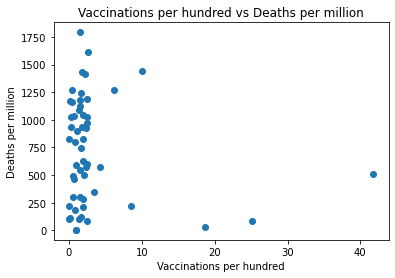

In [231]:
x = df_covid_merge['Vaccinations per hundred']
y = df_covid_merge['Deaths per million']

# Creating scatterplot
plt.scatter(x, y)

# Adding title and labels
plt.title('Vaccinations per hundred vs Deaths per million')
plt.xlabel('Vaccinations per hundred')
plt.ylabel('Deaths per million')

#### Does a correlation exist between the number of dead in COVID per capita and the attitude to vaccination?